In [1]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics

# Data Exploration

In [2]:
col_names=["Elevation", "Aspect", "Slope", "Horizontal_Distance_To_Hydrology", "Vertical_Distance_To_Hydrology", 
           "Horizontal_Distance_To_Roadways","Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm", 
           "Horizontal_Distance_To_Fire_Points", "Wilderness_Area1", "Wilderness_Area2", "Wilderness_Area3", 
           "Wilderness_Area4", "Soil_Type1", "Soil_Type2","Soil_Type3","Soil_Type4","Soil_Type5","Soil_Type6",
           "Soil_Type7","Soil_Type8","Soil_Type9","Soil_Type10","Soil_Type11", "Soil_Type12", "Soil_Type13",
           "Soil_Type14","Soil_Type15","Soil_Type16","Soil_Type17","Soil_Type18","Soil_Type19","Soil_Type20",
           "Soil_Type21","Soil_Type22", "Soil_Type23","Soil_Type24","Soil_Type25","Soil_Type26","Soil_Type27",
           "Soil_Type28","Soil_Type29","Soil_Type30","Soil_Type31", "Soil_Type32","Soil_Type33","Soil_Type34",
           "Soil_Type35","Soil_Type36","Soil_Type37","Soil_Type38","Soil_Type39","Soil_Type40", "Cover_Type"]

data = pd.read_csv('./covtype.data', sep = ',', names = col_names)
data 


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


In [ ]:
#data.isna().sum()

In [4]:
print(data.shape)
print(data.Cover_Type.value_counts())

(581012, 55)
2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64


/Users/liuxiaoyu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


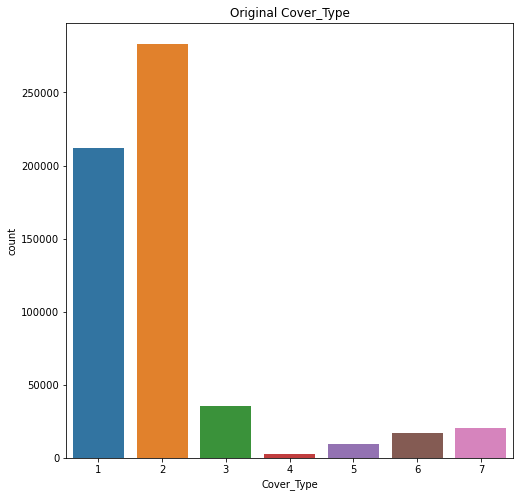

In [18]:
#plot the original dataset 
plt.figure(figsize=(8, 8))
sns.countplot('Cover_Type', data=data)
plt.title('Original Cover_Type')
plt.show()

# Resampling for imbanlanced dataset

/Users/liuxiaoyu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


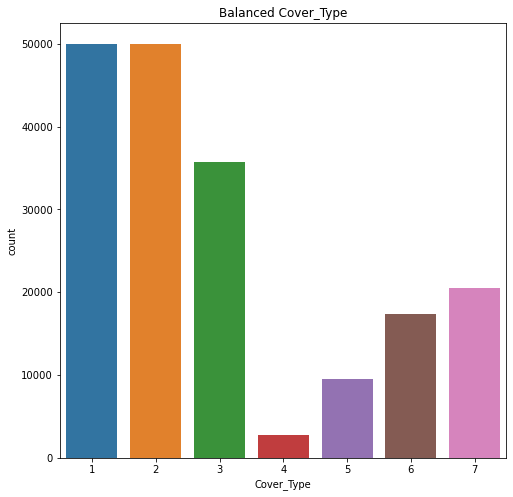

(185871, 55)
1    50000
2    50000
3    35754
7    20510
6    17367
5     9493
4     2747
Name: Cover_Type, dtype: int64


In [19]:
# Shuffle the Dataset.
shuffled_data = data.sample(frac=1,random_state=4)

# Put all the fraud class in a separate dataset.
all_other_type_data = shuffled_data.loc[(shuffled_data['Cover_Type'] != 1) & (shuffled_data['Cover_Type'] != 2)]


#Randomly select 492 observations from the non-fraud (majority class)
Cover_type_1_data=shuffled_data.loc[shuffled_data['Cover_Type']== 1].sample(n=50000,random_state=10)
Cover_type_2_data=shuffled_data.loc[shuffled_data['Cover_Type']== 2].sample(n=50000,random_state=10)

# Concatenate both dataframes again
sampled_data = pd.concat([Cover_type_1_data, Cover_type_2_data,all_other_type_data])

#plot the dataset after the undersampling
plt.figure(figsize=(8, 8))
sns.countplot('Cover_Type', data=sampled_data)
plt.title('Balanced Cover_Type')
plt.show()

print(sampled_data.shape)
print(sampled_data.Cover_Type.value_counts())

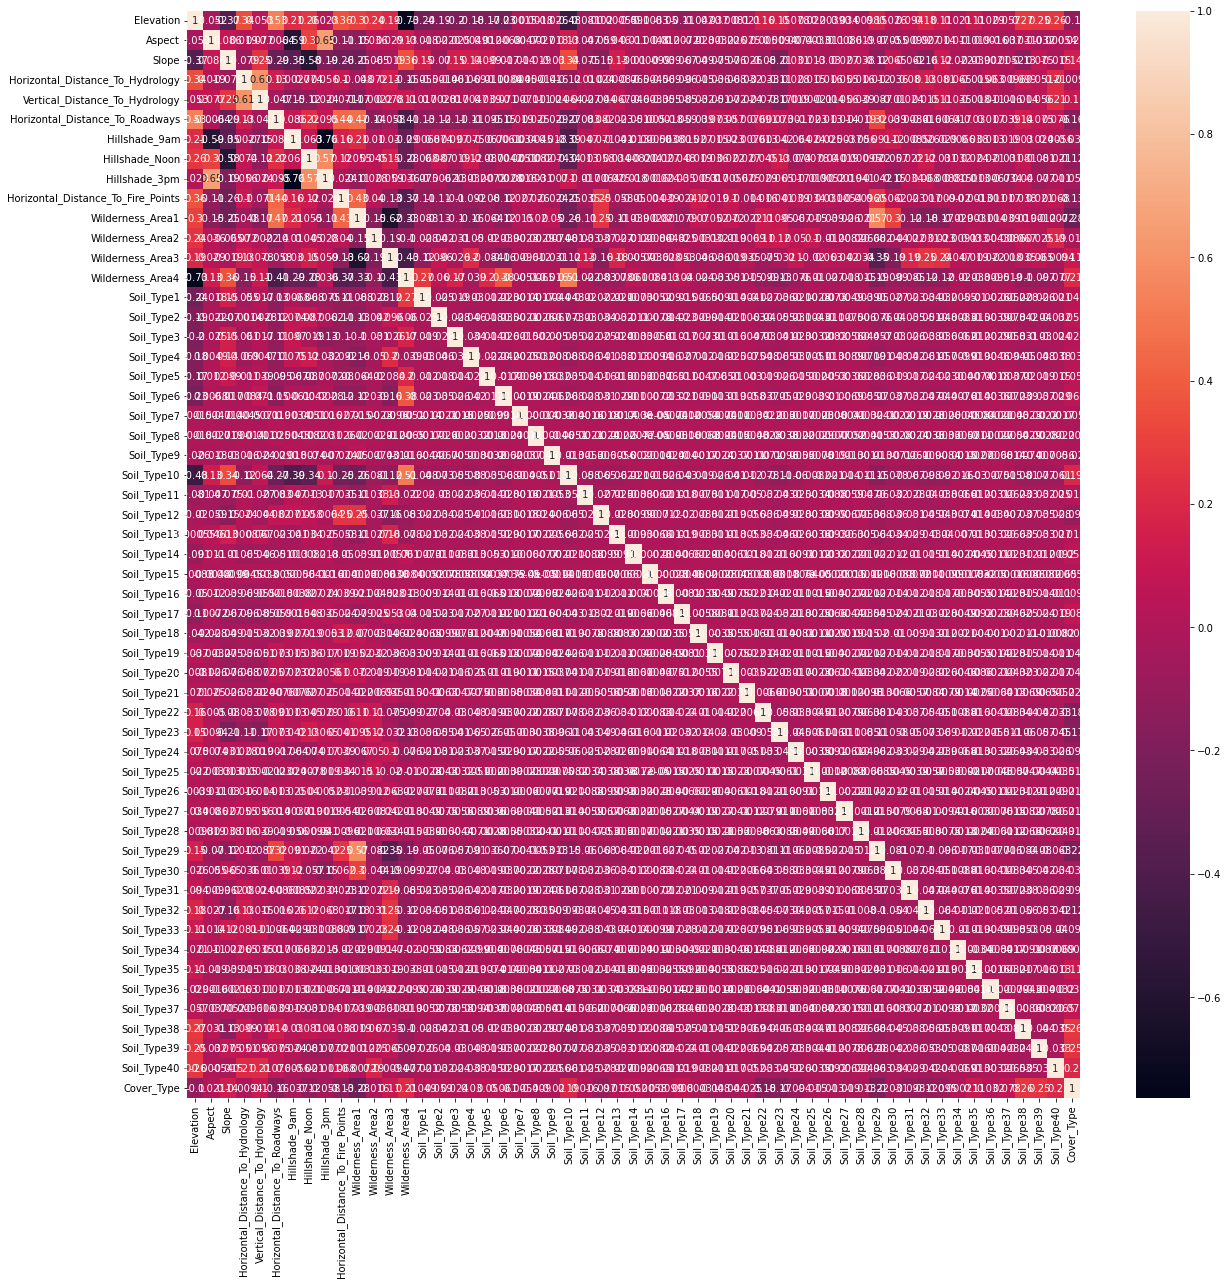

In [6]:
plt.figure(figsize=(20,20))
sns.heatmap(sampled_data.corr(), annot=True)

plt.show()

# Respose and Target variable

In [7]:
x = sampled_data.iloc[:, :-1]
y = sampled_data.iloc[:, -1]

# # check length of each cover type
# one = np.where(y==1)
# two = np.where(y==2)
# three = np.where(y==3)
# four = np.where(y==4)
# five = np.where(y==5)
# six = np.where(y==6)
# seven = np.where(y==7)

# len(one[0]), len(zero[2]), len(zero[3]), len(zero[4]), 
# len(zero[5]), len(zero[6]), len(zero[7])

# Data Splitting 

In [8]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [9]:
# Importing the PCA class from the decomposition module in sklearn
from sklearn.decomposition import PCA

# create a PCA object
pca = PCA(n_components = 54)# extracted features we want to end up within our new dataset(2).

# Apply the above object to our dataset using the fit method.
X_new = pca.fit(x)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_)
#hence, choosing n_components = 8 can represent most of the information of the original data

[7.06872022e-01 2.51495773e-01 2.73012369e-02 9.77221869e-03
 3.52901097e-03 5.48342110e-04 3.25515415e-04 1.45002407e-04
 9.84337235e-06 7.02882644e-07 9.14044854e-08 3.34527506e-08
 2.08996499e-08 1.80264242e-08 1.63885252e-08 1.47774022e-08
 1.33246896e-08 1.18893823e-08 1.08959756e-08 1.03338210e-08
 9.52811713e-09 8.97027873e-09 8.07629951e-09 7.49988576e-09
 6.97812273e-09 6.37215097e-09 6.25353074e-09 5.53092756e-09
 5.12256569e-09 4.35151752e-09 4.11362052e-09 3.33360386e-09
 2.83465961e-09 2.54757233e-09 1.85648386e-09 1.34993505e-09
 1.27638162e-09 1.12343098e-09 8.53882370e-10 7.79265639e-10
 6.34874018e-10 4.72639887e-10 4.04439601e-10 3.80992607e-10
 3.06025031e-10 2.67966648e-10 2.41718457e-10 1.23467774e-10
 1.02591814e-10 4.82623756e-11 2.98085497e-11 4.26930934e-12
 4.82438426e-33 4.82438426e-33]
[2.73861874e+06 9.74364545e+05 1.05772582e+05 3.78602922e+04
 1.36723696e+04 2.12442979e+03 1.26113722e+03 5.61779638e+02
 3.81359612e+01 2.72316278e+00 3.54126389e-01 1.29605

In [10]:
# create a new PCA object
pca = PCA(n_components = 8)# extracted features we want to end up within our new dataset(2).

# Apply the above object to our training dataset using the fit method.
X_train = pca.fit_transform(X_train)
print(X_train.shape)

# Apply the PCA object to the test set only to transform this set
X_test = pca.transform(X_test)
print(X_test.shape)

# # Apply the above object to our training dataset using the fit method.
# y_train = pca.fit_transform(y_train)
# print(y_train.shape)

# # Apply the PCA object to the test set only to transform this set
# y_test = pca.transform(y_test)
# print(y_test.shape)


(148696, 8)
(37175, 8)


In [11]:
# Introducing MinMaxScaler() to normalize data
mms = MinMaxScaler()

X_train = mms.fit_transform(X_train, y_train)
X_test = mms.transform(X_test)

# Model training

In [12]:
# Random Forest (RF)
rf = RandomForestClassifier(n_estimators=100,criterion="gini",max_depth=10,random_state=10)
rf.fit(X_train,y_train)

pred_rf = rf.predict(X_test)
target_names=['Cover_Type']

print(confusion_matrix(y_test,pred_rf)) 
print(classification_report(y_test,pred_rf))
print(accuracy_score(y_test,pred_rf))


[[7931 1680    7    0    4    5  321]
 [2179 7257  410    0   33  122   47]
 [   0  221 6693    1    1  168    0]
 [   0    0  408  108    0   37    0]
 [  59 1020   89    0  742   32    0]
 [   1  271 2042    2    3 1182    0]
 [ 625    6    0    0    0    0 3468]]
              precision    recall  f1-score   support

           1       0.73      0.80      0.76      9948
           2       0.69      0.72      0.71     10048
           3       0.69      0.94      0.80      7084
           4       0.97      0.20      0.33       553
           5       0.95      0.38      0.54      1942
           6       0.76      0.34      0.47      3501
           7       0.90      0.85      0.87      4099

    accuracy                           0.74     37175
   macro avg       0.82      0.60      0.64     37175
weighted avg       0.75      0.74      0.72     37175

0.7365433759246806


<AxesSubplot:>

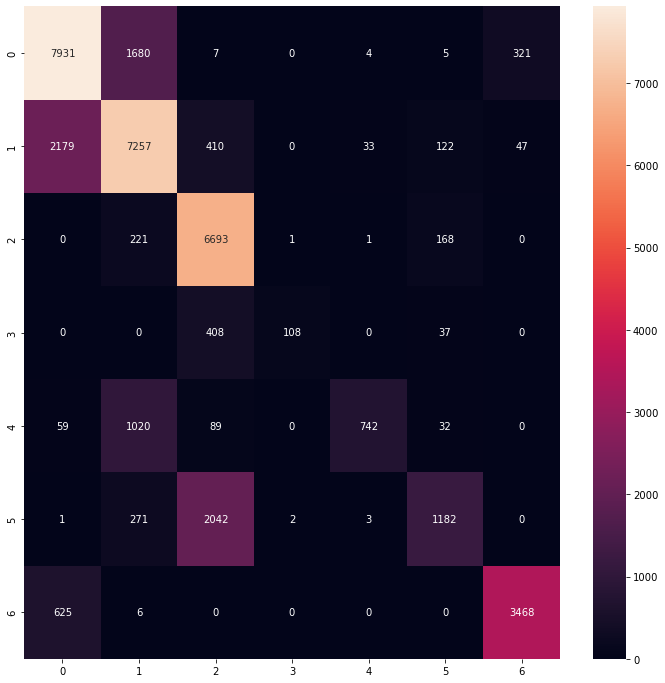

In [13]:
C= confusion_matrix(y_test,pred_rf)
plt.figure(figsize=(12, 12))
sns.heatmap(C,annot=True,fmt='d')

In [14]:
# Neutral network (MLP)
mlp = MLPClassifier(hidden_layer_sizes=(100,50),random_state=10, max_iter=2000).fit(X_train, y_train)
mlp.predict_proba(X_test[:1])

pred_mlp = mlp.predict(X_test)
target_names=['Cover_Type']

print(confusion_matrix(y_test,pred_mlp)) 
print(classification_report(y_test,pred_mlp))
print(accuracy_score(y_test,pred_mlp))

/Users/liuxiaoyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:619: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[[7690 1756    6    0   95    9  392]
 [2037 6953  393    1  394  213   57]
 [   0  202 6241   90   15  536    0]
 [   0    0   79  439    0   35    0]
 [  24  360   95    0 1450   13    0]
 [   0  141  759   52   41 2508    0]
 [ 388    2    1    0    1    0 3707]]
              precision    recall  f1-score   support

           1       0.76      0.77      0.77      9948
           2       0.74      0.69      0.71     10048
           3       0.82      0.88      0.85      7084
           4       0.75      0.79      0.77       553
           5       0.73      0.75      0.74      1942
           6       0.76      0.72      0.74      3501
           7       0.89      0.90      0.90      4099

    accuracy                           0.78     37175
   macro avg       0.78      0.79      0.78     37175
weighted avg       0.78      0.78      0.78     37175

0.7797713517148621


<AxesSubplot:>

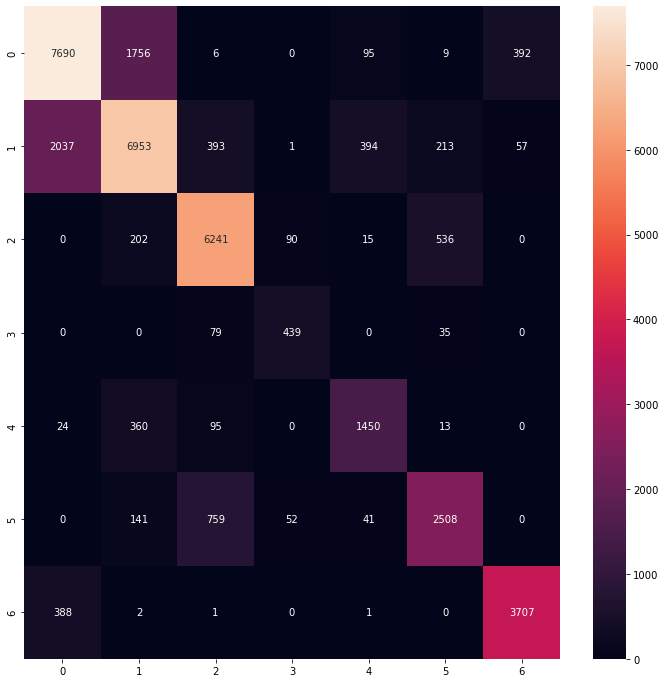

In [15]:
C= confusion_matrix(y_test,pred_mlp)
plt.figure(figsize=(12, 12))
sns.heatmap(C,annot=True,fmt='d')

# Model evaluating

In [16]:
# predict the RF with prodict_proba
rf_y_predict = rf.predict_proba(X_test)
print(rf_y_predict)

# predict the MLP with prodict_proba
mlp_y_predict = mlp.predict_proba(X_test)
print(mlp_y_predict)

[[0.00191347 0.01744141 0.38085909 ... 0.00618501 0.10860598 0.00149215]
 [0.35209419 0.61651123 0.01018231 ... 0.00663755 0.00205373 0.00281704]
 [0.3299555  0.51432918 0.03033866 ... 0.03891921 0.02573094 0.06068216]
 ...
 [0.6329071  0.26342038 0.00251196 ... 0.02942008 0.00483718 0.06683644]
 [0.05763791 0.25881995 0.54274772 ... 0.07878048 0.04125673 0.0164128 ]
 [0.00663117 0.03217587 0.51155825 ... 0.00286594 0.42493553 0.00076844]]
[[4.68744000e-07 6.41219807e-05 1.72238077e-01 ... 2.02243004e-07
  1.42934792e-01 2.35283627e-08]
 [3.25509011e-01 6.74490989e-01 2.72024245e-16 ... 1.37683253e-11
  2.97056538e-24 1.27521798e-17]
 [5.47632944e-02 9.44116335e-01 8.06827043e-07 ... 1.11939504e-03
  7.49896961e-08 9.38886580e-08]
 ...
 [6.17137405e-01 3.82861392e-01 9.48550985e-13 ... 1.20361217e-06
  4.00344412e-18 7.25367692e-12]
 [4.50195939e-04 8.26677952e-02 8.35765670e-01 ... 7.46669173e-02
  4.32749501e-03 2.12192616e-03]
 [5.13852704e-08 9.09012390e-05 2.56971822e-02 ... 3.671

#  ROC Visualisation¶

In [17]:
#rf roc for each type
# 计算每一类的ROC
fpr = dict()
tpr = dict()
roc_auc = dict()
y_score = rf.decision_function(X_test)
for i in range(7):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area（方法二）
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# Plot all ROC curves
lw=2
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)


colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(7), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()


AttributeError: 'RandomForestClassifier' object has no attribute 'decision_function'